In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("StatisticModel.csv")
df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,StackingRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.818297,19205.697521
1,StackingRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.818556,19160.060861
2,StackingRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.817641,19212.891271
3,StackingRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.820348,19128.098136
4,StackingRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.819074,19144.268012
...,...,...,...,...,...,...,...,...
359,StackingRG,UFS,75,NaN,OnehotEncoder,SimpleImputer,0.855647,18388.817270
360,StackingRG,UFS,85,NaN,OnehotEncoder,SimpleImputer,0.869350,17844.452393
361,StackingRG,UFS,95,NaN,OnehotEncoder,SimpleImputer,0.802577,17995.166813
362,StackingRG,UFS,105,NaN,OnehotEncoder,SimpleImputer,0.828023,18150.714634


In [3]:
df["Scaler"]=df["Scaler"].fillna("None")
df["Imputer"]=df["Imputer"].apply(lambda x:"SimpleImputer" if x=="Simpleimputer" else x)

In [4]:
df.sort_values("R2",ascending=False)

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
357,StackingRG,UFS,55,None,OnehotEncoder,SimpleImputer,0.913725,16813.535884
343,StackingRG,VarianceThreshold,410,None,OnehotEncoder,SimpleImputer,0.898918,16935.569190
344,StackingRG,VarianceThreshold,420,None,OnehotEncoder,SimpleImputer,0.898237,16944.830678
349,StackingRG,VarianceThreshold,470,None,OnehotEncoder,SimpleImputer,0.897385,16974.834144
348,StackingRG,VarianceThreshold,460,None,OnehotEncoder,SimpleImputer,0.896454,16958.990013
...,...,...,...,...,...,...,...,...
240,StackingRG,VarianceThreshold,420,Normalizer,LabelEncoder,KnnImputer,0.588931,34725.569383
245,StackingRG,VarianceThreshold,470,Normalizer,LabelEncoder,KnnImputer,0.504269,38529.171740
244,StackingRG,VarianceThreshold,460,Normalizer,LabelEncoder,KnnImputer,0.501238,38607.048447
246,StackingRG,VarianceThreshold,480,Normalizer,LabelEncoder,KnnImputer,0.326941,46606.788414


# Distribution of R2 Score

<Axes: xlabel='R2', ylabel='Count'>

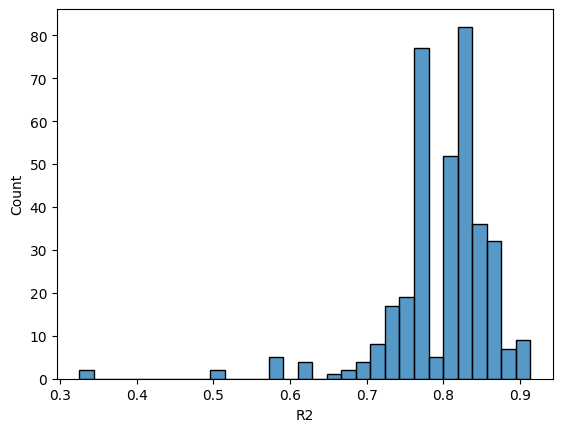

In [5]:
sns.histplot(data=df,x="R2")

# R2 score depend on UFS

Text(0.5, 0, 'Number of feature')

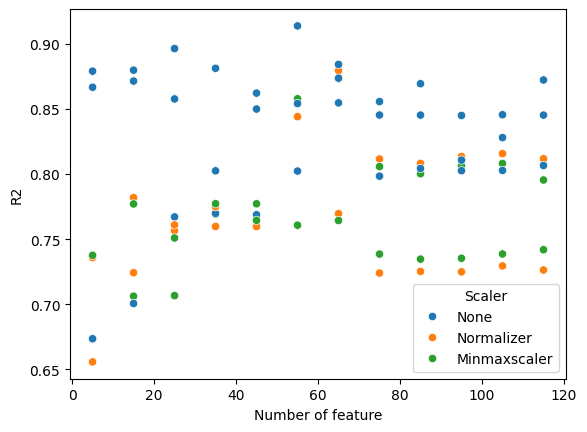

In [6]:
sns.scatterplot(data=df.loc[(df["feature_selection"]=="UFS")],x="NOF",y="R2",hue="Scaler")
plt.xlabel("Number of feature")

<Axes: xlabel='NOF', ylabel='R2'>

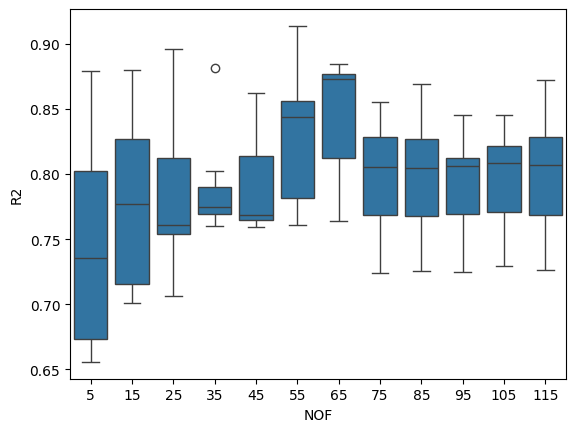

In [7]:
sns.boxplot(data=df.loc[(df["feature_selection"]=="UFS")],x="NOF",y="R2")

In [8]:
def find(nof,feature):
    maxr2_for_each_NOF=df.loc[(df["feature_selection"]==feature)].loc[(df["NOF"]==nof)]
    maxr2_for_each_NOF=maxr2_for_each_NOF.sort_values("R2",ascending=False).head(1)
    return maxr2_for_each_NOF

In [9]:
maxr2_for_each_NOF=find(5,"UFS")
for i in range(6,121):
    maxr2_for_each_NOF=pd.concat([maxr2_for_each_NOF,find(i,"UFS")])
maxr2_for_each_NOF

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
40,StackingRG,UFS,5,None,LabelEncoder,SimpleImputer,0.878995,20098.597067
41,StackingRG,UFS,15,None,LabelEncoder,SimpleImputer,0.879771,19827.902951
354,StackingRG,UFS,25,None,OnehotEncoder,SimpleImputer,0.896336,18469.819471
355,StackingRG,UFS,35,None,OnehotEncoder,SimpleImputer,0.881180,18377.964652
44,StackingRG,UFS,45,None,LabelEncoder,SimpleImputer,0.862143,18274.744187
357,StackingRG,UFS,55,None,OnehotEncoder,SimpleImputer,0.913725,16813.535884
358,StackingRG,UFS,65,None,OnehotEncoder,SimpleImputer,0.884180,17626.208054
359,StackingRG,UFS,75,None,OnehotEncoder,SimpleImputer,0.855647,18388.817270
360,StackingRG,UFS,85,None,OnehotEncoder,SimpleImputer,0.869350,17844.452393
49,StackingRG,UFS,95,None,LabelEncoder,SimpleImputer,0.844991,18520.056159


# Max R2 for each NOF

<Axes: xlabel='NOF', ylabel='R2'>

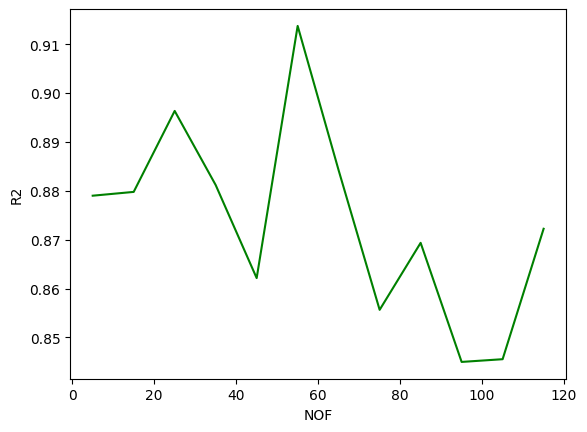

In [10]:
sns.lineplot(data=maxr2_for_each_NOF,x="NOF",y="R2",color="green")

In [11]:
maxr2_for_each_thresh=find(100,"VarianceThreshold")
for i in range(101,501):
    maxr2_for_each_thresh=pd.concat([maxr2_for_each_thresh,find(i,"VarianceThreshold")])
maxr2_for_each_thresh

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
156,StackingRG,VarianceThreshold,100,None,LabelEncoder,KnnImputer,0.837634,20867.025753
209,StackingRG,VarianceThreshold,110,Normalizer,LabelEncoder,KnnImputer,0.873179,20109.757226
262,StackingRG,VarianceThreshold,120,Minmaxscaler,LabelEncoder,KnnImputer,0.848856,16847.402363
107,StackingRG,VarianceThreshold,130,Minmaxscaler,LabelEncoder,SimpleImputer,0.839950,20810.840834
108,StackingRG,VarianceThreshold,140,Minmaxscaler,LabelEncoder,SimpleImputer,0.834265,20905.828664
161,StackingRG,VarianceThreshold,150,None,LabelEncoder,KnnImputer,0.833160,20596.572614
266,StackingRG,VarianceThreshold,160,Minmaxscaler,LabelEncoder,KnnImputer,0.831344,16995.665292
215,StackingRG,VarianceThreshold,170,Normalizer,LabelEncoder,KnnImputer,0.858769,20443.241006
216,StackingRG,VarianceThreshold,180,Normalizer,LabelEncoder,KnnImputer,0.834896,21322.381519
165,StackingRG,VarianceThreshold,190,None,LabelEncoder,KnnImputer,0.830071,20666.166372


Text(0.5, 0, 'Threshold')

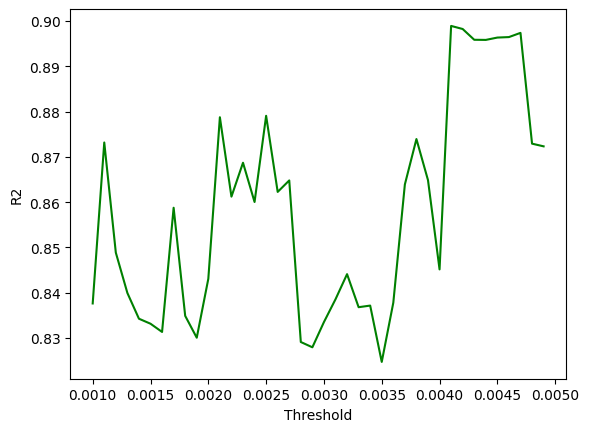

In [12]:
sns.lineplot(data=maxr2_for_each_thresh,x=df["NOF"]/100000,y="R2",color="green")
plt.xlabel("Threshold")

# R2 score depend on Variance Threshold

Text(0.5, 0, 'Threshold')

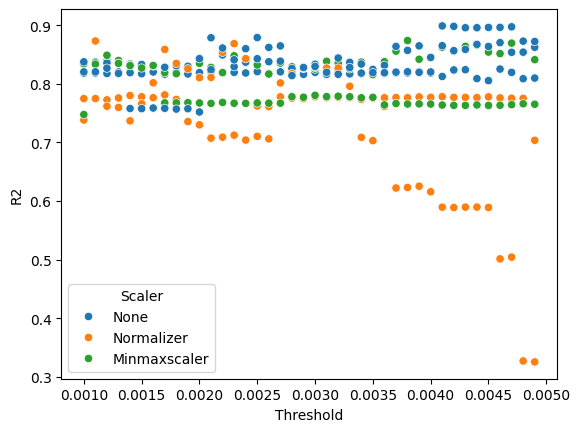

In [13]:
sns.scatterplot(data=df.loc[(df["feature_selection"]=="VarianceThreshold")],x=df["NOF"]/100000,y="R2",hue="Scaler")
plt.xlabel("Threshold")

# R2 depend on Scaler

<Axes: xlabel='Scaler', ylabel='R2'>

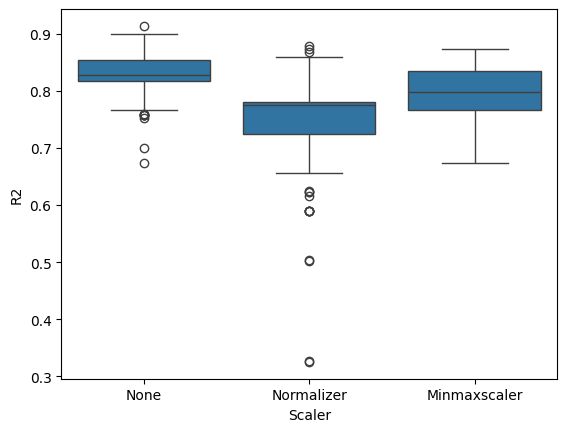

In [14]:
sns.boxplot(data=df, x="Scaler",y="R2")

# R2 depend on Imputer

<Axes: xlabel='Imputer', ylabel='R2'>

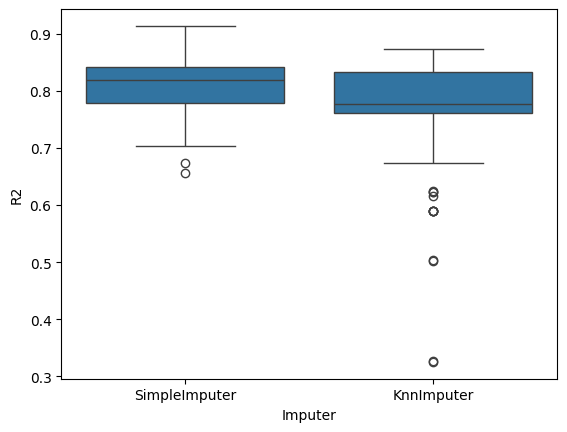

In [15]:
sns.boxplot(data=df,x="Imputer",y="R2")

<Axes: xlabel='Encoder', ylabel='R2'>

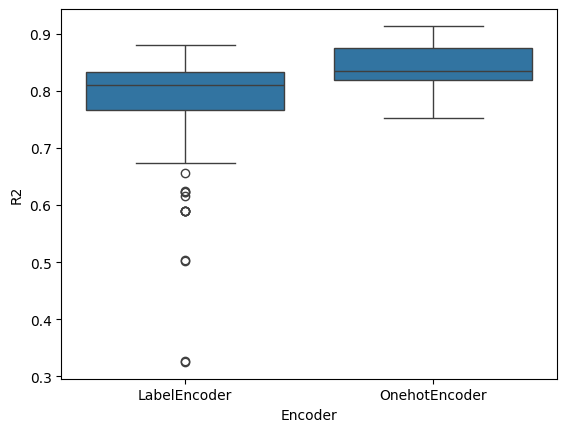

In [16]:




sns.boxplot(data=df,x="Encoder",y="R2")